<a href="https://colab.research.google.com/github/jon-pun/Spring-2023-ORIE-4741/blob/main/week14_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Linear Regression

## Libraries
- Will be using [Statsmodels](http://statsmodels.sourceforge.net/) since it has some nice characteristics for linear modeling.

In [1]:
# imports
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")


from statsmodels import api as sm

# this allows plots to appear directly in the notebook
%matplotlib inline

Mounted at /content/drive


In [ ]:
#test
#change
#for
#ENGRC 3027

## Example: California House Price Data
This is a dataset from a 1990s paper `Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.`

The aim here is to understand the factors that influence home prices in California.

In [2]:
# read data into a DataFrame
## REMEMBER TO CHANGE THIS
data = pd.read_csv('California_Houses.csv')
data.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.517001   
1   554279.850069         733236.884360         65049.908574   
2   554610.717069         733525.682937         64867.289833   
3   555194.266086         734095.290744         65287.138412   
4   555194.266086         734095.290744         65287.138412   

   Distance_to_SanFrancisco  
0              21250.213767  
1              20880.600400  
2              18811.487450  
3              18031.047568  
4              18031.047568

What are the **independent variaBles**?

Here are the column explanations:

2. Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]
3. Median Age: Median age of a house within a block; a lower number is a newer building [years]
4. Total Rooms: Total number of rooms within a block
5. Total Bedrooms: Total number of bedrooms within a block
6. Population: Total number of people residing within a block
7. Households: Total number of households, a group of people residing within a home unit, for a block
8. Latitude: A measure of how far north a house is; a higher value is farther north [°]
9. Longitude: A measure of how far west a house is; a higher value is farther west [°]
10. Distance to coast: Distance to the nearest coast point [m]
11. Distance to Los Angeles: Distance to the centre of Los Angeles [m]
12. Distance to San Diego: Distance to the centre of San Diego [m]
13. Distance to San Jose: Distance to the centre of San Jose [m]
14. Distance to San Francisco: Distance to the centre of San Francisco [m]

What is the **outcome** we want to understand?
1. Median House Value: Median house value for households within a block (measured in US Dollars) [$]


In [3]:

# print the shape of the DataFrame
data.shape

(20640, 14)

There are 20,640 **observations** with 14 **columns**

# 1. Data exploration

Let's first take a look at all the columns in the dataset.

In [4]:
data.describe()

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
count       20640.000000    2.064000e+04          2.064000e+04   
mean        40509.264883    2.694220e+05          3.981649e+05   
std         49140.039160    2.477324e+05          2.894006e+05   
min           120.676447    4.205891e+02          4.849180e+02   
25%          9079.756762    3.211125e+04          1.594264e+05   
50%         20522.019101    1.736675e+05          2.147398e+05   
75%         49830.414479    5.271562e+05          7.057954e+05   
max        333804.686371    1.018260e+06          1.196919e+06   

       Distance_to_SanJose  Distance_to_SanFrancisco  
count         20640.000000              20640.000000  
mean         349187.551219             386688.422291  
std          217149.875026             250122.192316  
min             569.448118                456.141313  
25%          113119.928682             117395.477505  
50%          459758.877000             526546.661701  
75%          516946.490963             584552.007907  
max          836762.678210             903627.663298

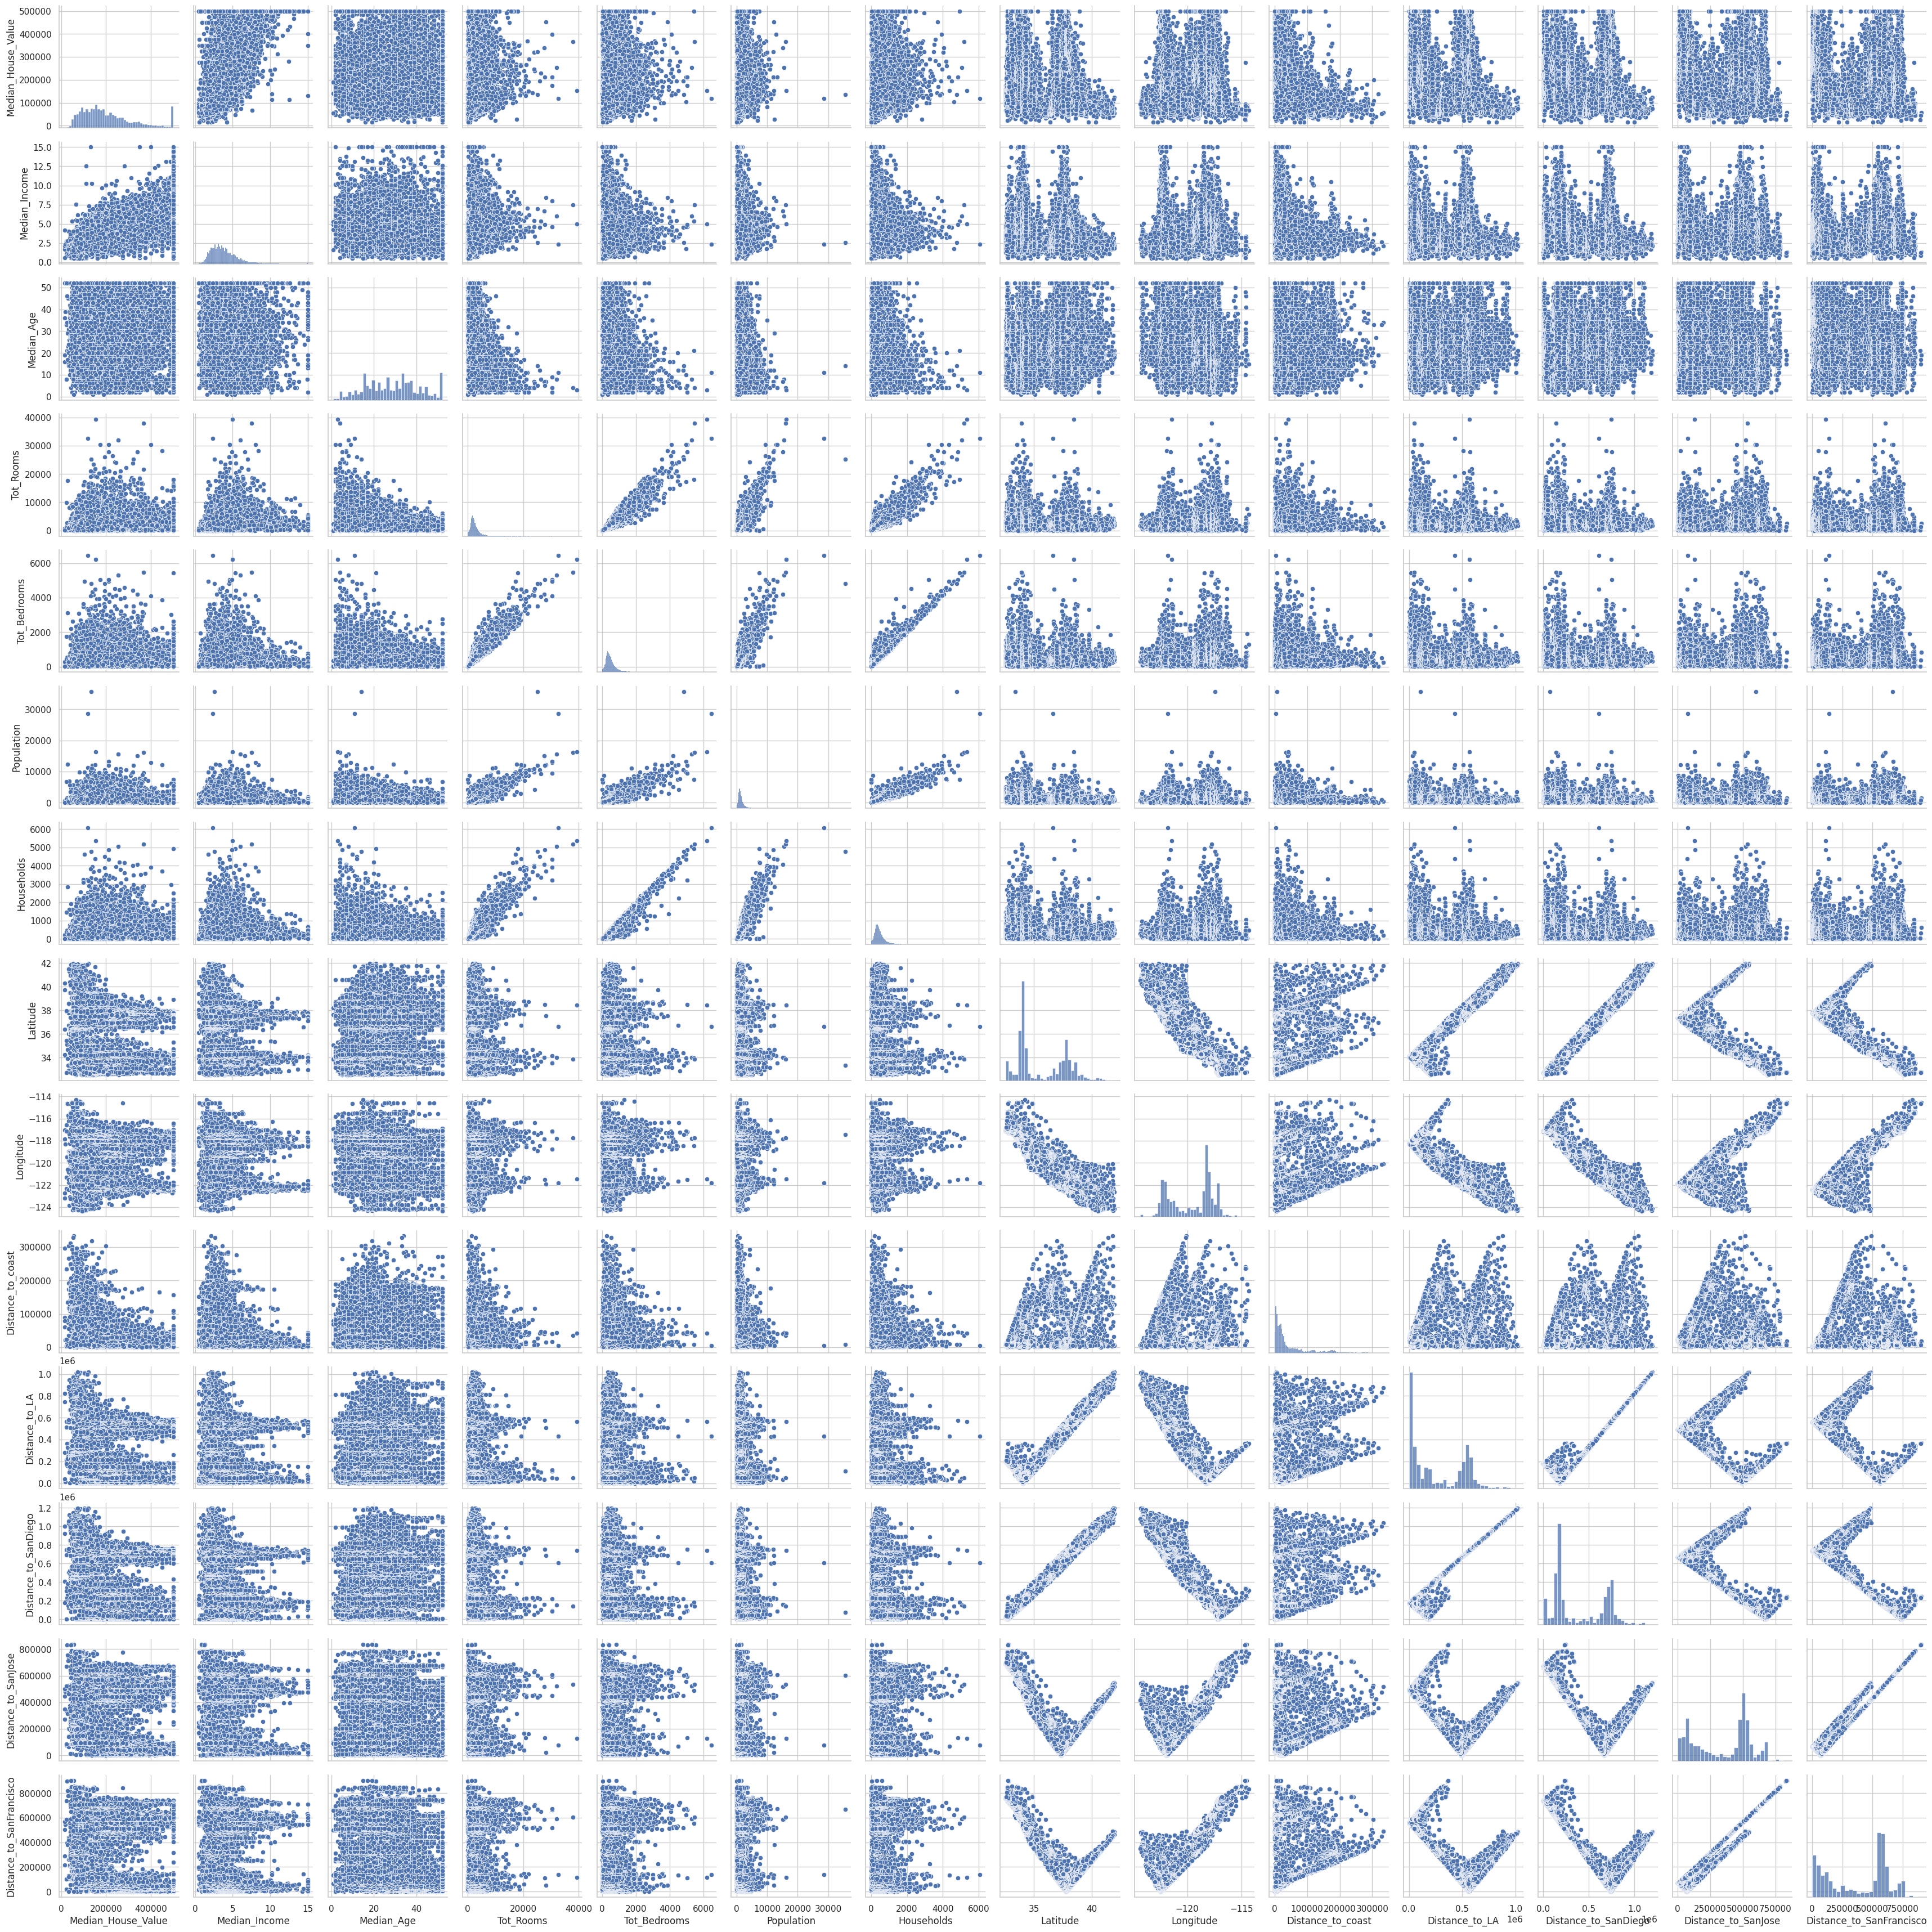

In [5]:
sns.pairplot(data)

That's a lot of plots! However, notice the first row, where all the data is being plotted against the house value column. I'm going to highlight this below:

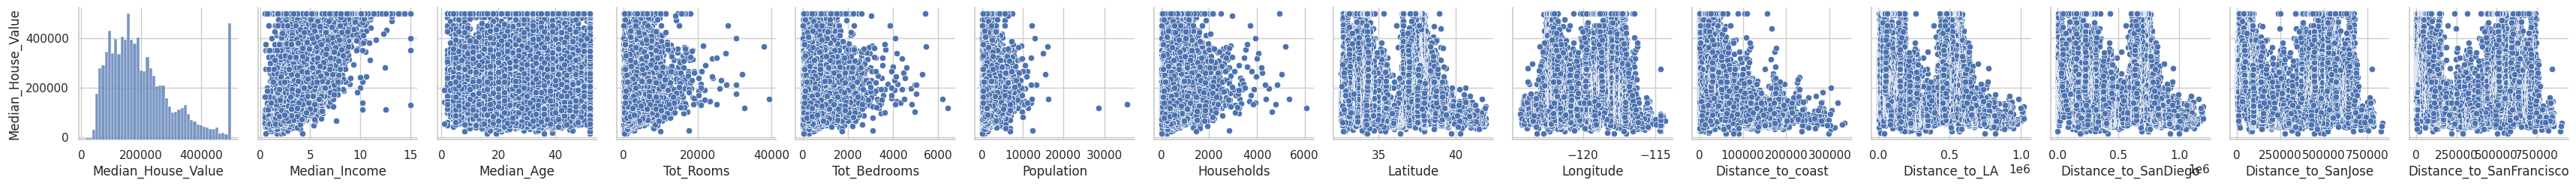

In [6]:
sns.pairplot(data, x_vars=data.columns, y_vars='Median_House_Value')

What we can see, in particular, is that there's a large spike in values at home value at $500,000.

array([[<Axes: title={'center': 'Median_House_Value'}>]], dtype=object)

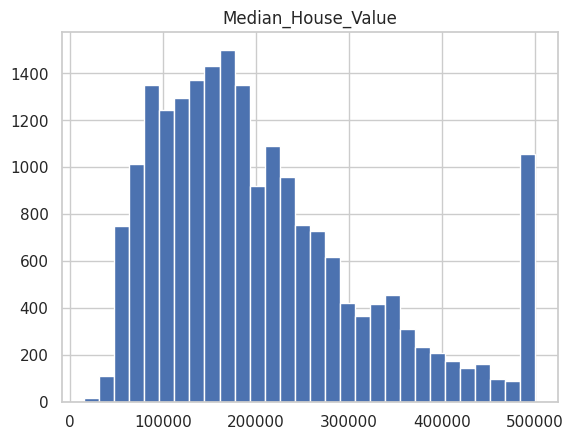

In [7]:
data.hist('Median_House_Value',bins=30)

It seems like, for some reason, the house values are capped at $500,000. If we look at a scatterplot of the house value against income, we can get a sense of how this might affect our regression outcomes.

<Axes: xlabel='Median_Income', ylabel='Median_House_Value'>

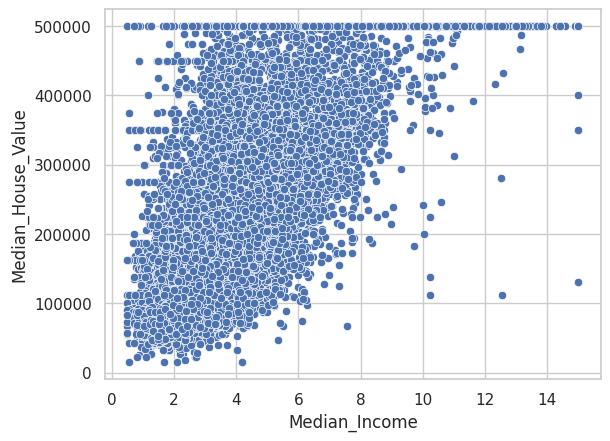

In [8]:
sns.scatterplot(x='Median_Income', y='Median_House_Value', data=data)

Keep this in mind!

### Correlation matrix

We are now going to look at, essentially, a summary of the pairplot above: the **correlation matrix**. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.

For our color map, you can refer to [this page](https://seaborn.pydata.org/tutorial/color_palettes.html) to get a sense of what colors to use. We are going to use a **diverging color map** since we want colors to reprsent values <0 and values > 0.


<Axes: >

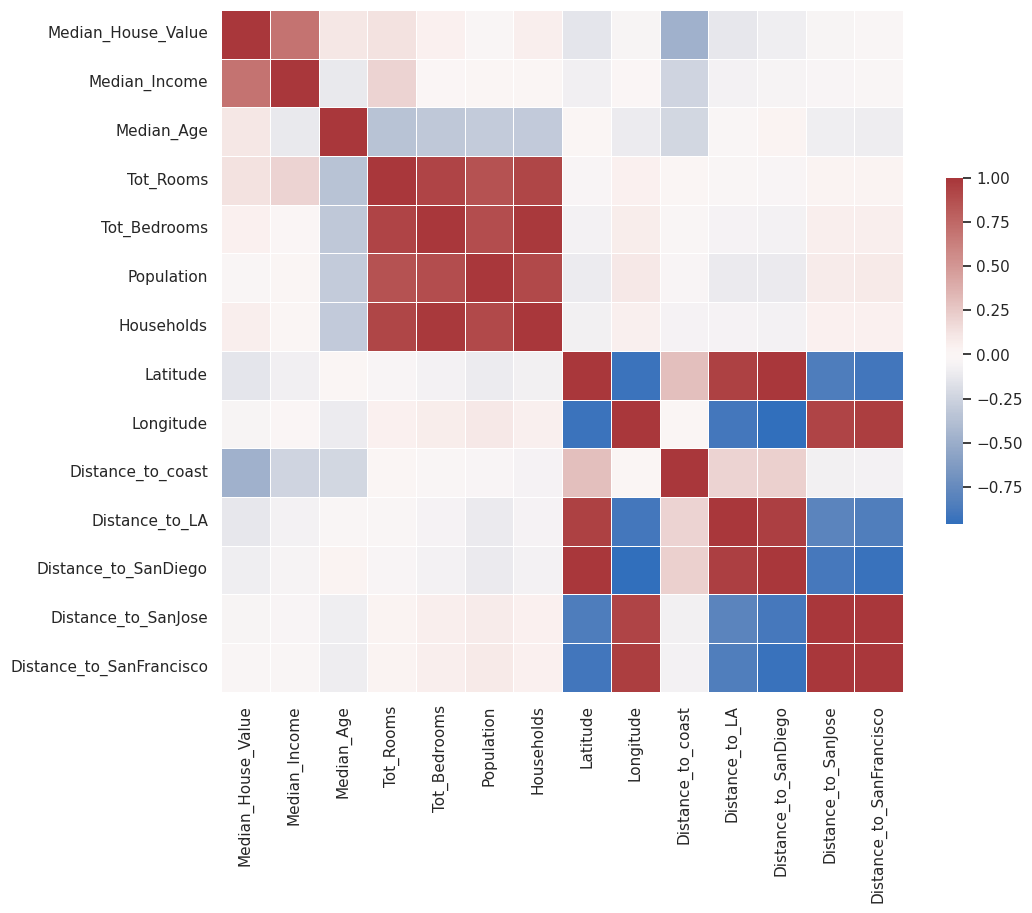

In [9]:

# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap = 'vlag',center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
# cmap is the color map we are using
# center tells us where the middle of the color map (white) is
# square makes the heatmap square (1:1 ratio)
# linewidths is the width of the lines that separate the boxes
# bar_kws shrinks the color bar

## 2. Simple linear regression

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals**:

<img src="https://raw.githubusercontent.com/justmarkham/DAT4/master/notebooks/08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="https://raw.githubusercontent.com/justmarkham/DAT4/master/notebooks/08_slope_intercept.png">

### Questions About the Housing Data


For this exercise, we are interested in the factors that determine the median house value in a particular Census block.
- We want to see if income is related to house value
- We are eventually interested if proximity to certain places, such as the coast major cities affect house prices.

Looking at our correlation matrix above, we can see that distance to the coast the **negatively correlated** with the median house value. The correlations for the rest of the distance based measures to the house price does not seem to be huge.

So, we might hypothesize that distance to the coast will be an important negative coefficient in our study.

### Comparing to Income first
Before we do the full model, let's use a simply linear regression model example understand our data a bit better.

Let's use **Statsmodels** to estimate the model coefficients for median income. We are pretty certain that house value and income will be **negatively** related. That is, the higher the median income of an area, the higher the median house value.

In [10]:
y = data['Median_House_Value']
X = data['Median_Income']

# To add a constant term to the model, we first need to import and add the constant to the data
X = sm.add_constant(X)
lm = sm.OLS(y,X,hasconst=True).fit()

# print the coefficients
lm.params

const            45085.576703
Median_Income    41793.849202
dtype: float64

## Hypothesis Testing and p-values

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between income and house value (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between income and house value (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [11]:
# print the p-values for the model coefficients
lm.pvalues

const            9.882299e-248
Median_Income     0.000000e+00
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for income is far less than 0.05, and so we **believe** that there is a relationship between income and house value.

Note that we generally ignore the p-value for the intercept.

Let's calculate the R-squared value for our simple linear model:

In [12]:
# print the R-squared value for the model
lm.rsquared

0.47344749180719903

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

### Putting it all together
Now, we can look at all these components from our regression results using the `.summary()` function.

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:46:41   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.509e+04   1322.872     34.082      0.000    4.25e+04    4.77e+04
Median_Income  4.179e+04    306.806    136.223      0.000    4.12e+04    4.24e+04
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Reading these results

- We got a 0.473 adjusted R-squared.
- Our `Median_Income` coefficient shows that, for every increase in $10k our house value loses about 41793 dollars.
- We can see from the `P >|t|` column in our results that our `Median_Income` has an essentially 0% chance that it's zero, meaning the results are statistically significant.


These results aren't too bad, but let's see how well our model did using other model evaluation techniques.

## Using the Model for Prediction

Let's say that we wanted to price a new house and we know the median income was **50,000**. What would we predict for the house value? Since our median house value unit is $10K, we are going to input only 5 as our independent variable.

$$
y = \beta_0 + \beta_1x \\
y = 45,085 + 5 x 41,793
$$

## Model Evaluation
Now, we are going to see how well our model did. First, we are going to use the `predict()` function to make a prediction of all of our outcomes based on the one independent variable we put into the model.

In [14]:
y_pred = lm.predict(X)

## Plotting the Least Squares Line

Now, we are going to bring back our `median income` and house value scatterplot, but overlay it with our regression predictions.

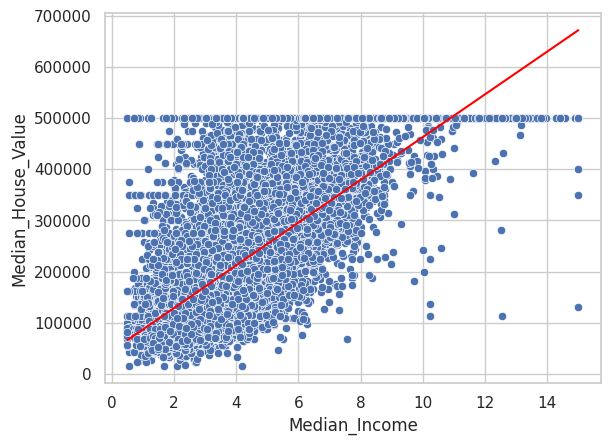

In [15]:
# first, plot the observed data

sns.scatterplot(data=data, y='Median_House_Value', x='Median_Income')

# then, plot the least squares line

# Here I'm setting the min and max x values to be those from our independent variable.
min_x_axis_val = data['Median_Income'].min()
max_x_axis_val = data['Median_Income'].max()

## Let's bring our betas into the equation
## This is our intercept
beta0 = lm.params[0]
## This is the slope
beta1 = lm.params[1]


length = np.linspace(min_x_axis_val,max_x_axis_val,)
pred = beta0 + beta1*length

plt.plot(length,pred, color='red')


Hm... Just eyeballing this plot, we know that our red regression line looks a little too tilted! It seems like the slope should probably be steeper.

How does our residual plot look? Let's add a column in our original dataset where we store the residuals. Again, remember that our residuals are telling us how much we are under- or over-predicting vs the actual data.

In [16]:
data['residual'] = data['Median_House_Value'] - y_pred

We can plot our residuals against a couple of variables. We are first going to plot it against the independent variable `Median_Income`.

There is a clear pattern here! It's not "just noise", which is what we want our residuals to be. The below tells us that, as income increases, our residuals are decreases. We are in increasingly underestimating our actual values as income increases. Also, that strange $500,000 house value cap is rearing it's ugly head by also capping our residuals.

<Axes: xlabel='Median_Income', ylabel='residual'>

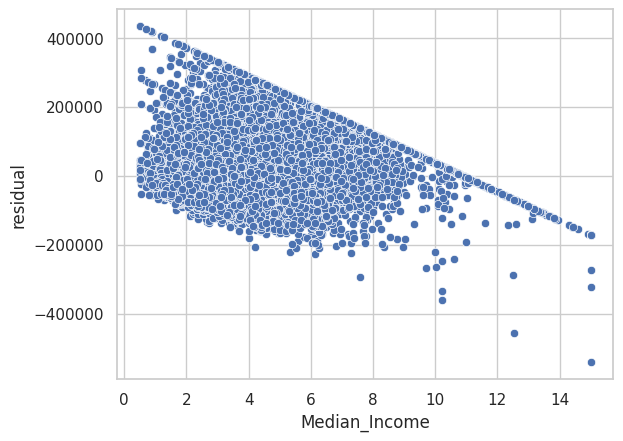

In [17]:
sns.scatterplot(data=data, x='Median_Income', y='residual')

This is another way to looking at our residuals, which is comparing the dependent variable (House value) to the residuals. This tell us that, as distance to coast is increasing, we are also increasing how much our model under-predicts the actual data. And as distance to coast decreases, we are increasing how much our model over-predicts the actual data. Again, there are patterns here! It doesn't look like "just noise"!

<Axes: xlabel='Median_House_Value', ylabel='residual'>

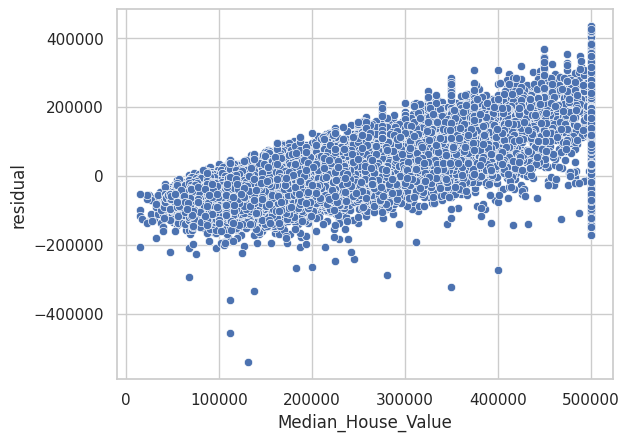

In [18]:
sns.scatterplot(data=data, x='Median_House_Value', y='residual')

# 3. Data Cleaning

From the above, we can see that we want to clean up our dataset a bit for the following things:
- The 500,000 house value cap seems to be an issue at the high end of house values. Let's remove all the data that has a $500,000 house value.
- There are some very high income areas that have some relatively low house values. We might want to remove these outliers as well as they will skew our analyis.

In [19]:
## This creates a new dataframe called data_new that only contains rows where the Median_House_Value is less than 500000
data_new = data[data['Median_House_Value'] < 500000]

## Let's also remove the rows where the Median_Income is greater than 11s
data_new = data_new[data_new['Median_Income'] < 11]

In [20]:
X_new = data_new['Median_Income']
X_new = sm.add_constant(X_new)
y_new = data_new['Median_House_Value']
lm_new = sm.OLS(y_new,X_new).fit()



In [21]:
lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Value   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                 1.421e+04
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:47:39   Log-Likelihood:            -2.4795e+05
No. Observations:               19634   AIC:                         4.959e+05
Df Residuals:                   19632   BIC:                         4.959e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.337e+04   1352.812     32.061      0.000    4.07e+04     4.6e+04
Median_Income  4.048e+04    339.494    119.222      0.000    3.98e+04    4.11e+04
==============================================================================
Omnibus:                     3198.542   Durbin-Watson:                   0.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5758.565
Skew:                           1.043   Prob(JB):                         0.00
Kurtosis:                       4.639   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that our adjusted R-squareds look a little worse than before, but however:

In [22]:

y_pred_new = lm_new.predict(X_new)

data_new['residual'] = data_new['Median_House_Value'] - y_pred_new

This picture looks a lot closer to what we think we should be modeling!

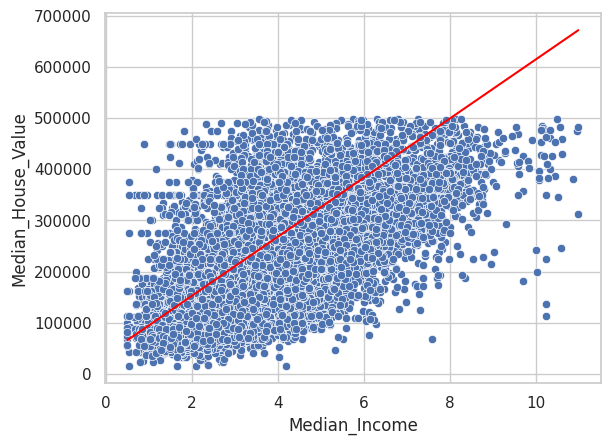

In [23]:
# first, plot the observed data
sns.scatterplot(data=data_new, y='Median_House_Value', x='Median_Income')

# # then, plot the least squares line
# # then, plot the least squares line
min_x_axis_val_new = data_new['Median_Income'].min()
max_x_axis_val_new  = data_new['Median_Income'].max()

## Let's bring our betas into the equation
beta0_new = lm_new.params[0]
beta1_new = lm_new.params[1]


length_new = np.linspace(min_x_axis_val_new,max_x_axis_val_new)
pred_new= beta0_new + beta1_new*length_new
plt.plot(length_new,pred,color='red')

We still have this residual pattern though:

<Axes: xlabel='Median_House_Value', ylabel='residual'>

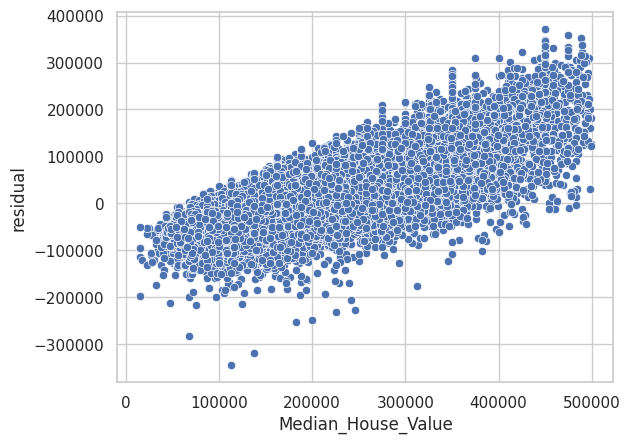

In [24]:
sns.scatterplot(data=data_new, x='Median_House_Value', y='residual')

# 3. Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$$y = \beta_0 + \beta_1 \times Income + \beta_2 \times Population Density + \beta_3 \times Median Age + ...$$

Let's use Statsmodels to estimate the relationship between home values and all of our other variables.

In [25]:
# create a fitted model with all three features
X2 = data_new[[ 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco' ]]

X2 = sm.add_constant(X2)
y2 = data_new['Median_House_Value']
lm2 = sm.OLS(y2,X2).fit()

# print the coefficients
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Value   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     2437.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:48:06   Log-Likelihood:            -2.4386e+05
No. Observations:               19634   AIC:                         4.878e+05
Df Residuals:                   19620   BIC:                         4.879e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.571e+06   2.06e+05     -7.630      0.000   -1.97e+06   -1.17e+06
Median_Income             3.912e+04    380.694    102.764      0.000    3.84e+04    3.99e+04
Median_Age                 753.2900     41.234     18.269      0.000     672.467     834.113
Tot_Rooms                   -7.6907      0.738    -10.423      0.000      -9.137      -6.244
Tot_Bedrooms                97.6049      6.201     15.740      0.000      85.450     109.760
Population                 -31.4750      0.961    -32.749      0.000     -33.359     -29.591
Households                  40.0101      6.615      6.048      0.000      27.043      52.977
Latitude                  -3.87e+04   2477.508    -15.623      0.000   -4.36e+04   -3.38e+04
Longitude                 -2.45e+04   1477.333    -16.581      0.000   -2.74e+04   -2.16e+04
Distance_to_coast           -0.2266      0.017    -12.974      0.000      -0.261      -0.192
Distance_to_LA              -0.1319      0.007    -19.476      0.000      -0.145      -0.119
Distance_to_SanDiego         0.2117      0.025      8.579      0.000       0.163       0.260
Distance_to_SanJose          0.1285      0.021      6.200      0.000       0.088       0.169
Distance_to_SanFrancisco    -0.1092      0.022     -4.926      0.000      -0.153      -0.066
==============================================================================
Omnibus:                     3963.368   Durbin-Watson:                   0.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11584.113
Skew:                           1.058   Prob(JB):                         0.00
Kurtosis:                       6.112   Cond. No.                     3.48e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What are a few key things we learn from this output?
- Almost everything is statistically significant.
- This model has a higher **adjusted R-squared** (0.617) than the previous model, which means that this model provides a better fit to the data than a model that only includes income.
- Distance is always important, but not always in the same direction:
    - Distance to coast negatively associated with the value. That means as distance increases, value decreases. The same is true for LA and SF.
    - However, the closer we get to San Diego and San Jose, the higher house values actually are. So, at least in the 1990s, when this paper was published, were those cities disamenities?

In [26]:
y_pred_2 = lm2.predict(X2)
data_new['residual2'] = data_new['Median_House_Value'] - y_pred_2

We can't really plot the prediction line anymore, since we have many independent variables now. But, we can still take a look at the residuals.

<Axes: xlabel='Median_House_Value', ylabel='residual2'>

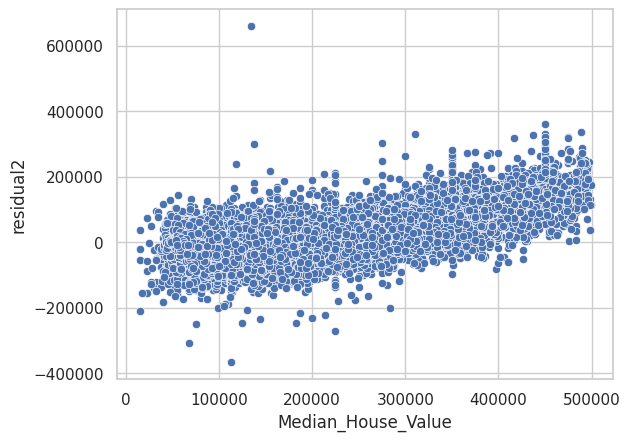

In [27]:
sns.scatterplot(data=data_new, x='Median_House_Value', y='residual2')

Our adjusted R-squareds did improve. However, we can see that there are still perhaps some outliers and ways we can clean the data more. What might you do in the next steps? What other variables might you include?

Also - this is beyond the scope of this class - but this dataset is from a paper that is looking at spatial autocorrelation in regressions. In other words, in addition to all the independent variables we included in the regression, your neighbor's house price might have an influence on your own, and other aspects of the neighboring areas might have an impact in your own neighborhood's median house value.

## What Didn't We Cover?

- Detecting collinearity
- Transforming predictors to fit non-linear relationships
- Assumptions of linear regression
- And so much more!

You could certainly go very deep into linear regression, and learn how to apply it really, really well. It's an excellent way to **start your modeling process** when working a regression problem. However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the independent and dependent variables.